<a href="https://www.kaggle.com/code/ravi047/covid-19-analysis?scriptVersionId=120517304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Step 1: Install Required Libraries

pandas: to work with dataframes
matplotlib: to plot the data
seaborn: to enhance the plot

In [1]:
!pip install pandas matplotlib seaborn


/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [3]:
# Load data
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url)


Data Preprocessing

In [4]:
# Remove unnecessary columns
df = df.drop(['iso_code', 'continent', 'tests_per_case', 'new_tests_smoothed_per_thousand', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'new_cases_smoothed', 'new_deaths_smoothed', 'handwashing_facilities', 'female_smokers', 'male_smokers', 'stringency_index', 'hospital_beds_per_thousand', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'aged_65_older', 'aged_70_older'], axis=1)

# Filter data for a specific country
df = df[df['location'] == 'United States']


 Data Analysis

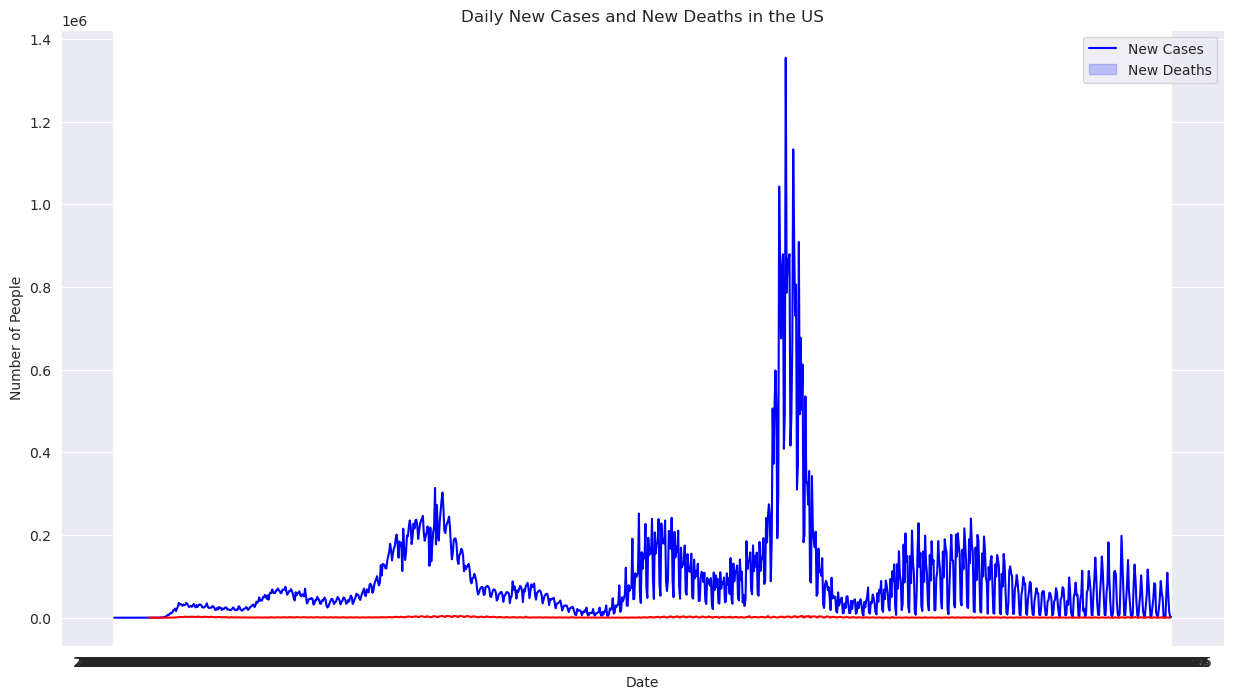

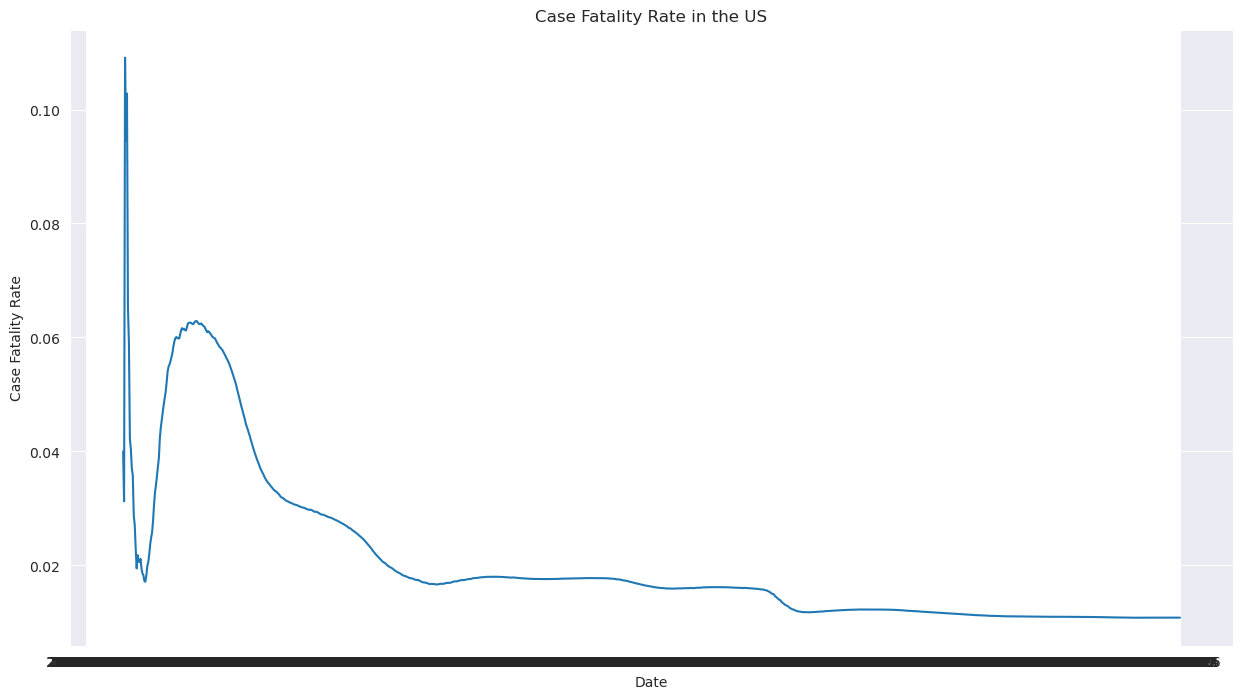

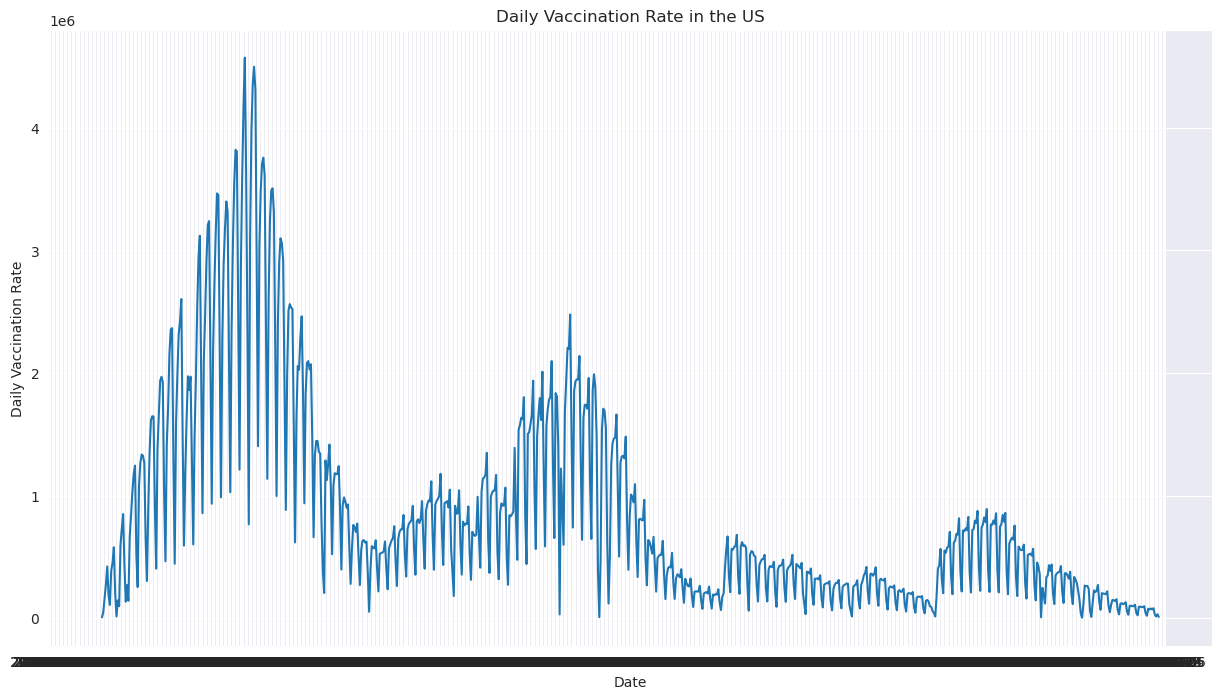

In [5]:
# Plot daily new cases and new deaths
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df, x='date', y='new_cases', ax=ax, color='blue')
sns.lineplot(data=df, x='date', y='new_deaths', ax=ax, color='red')
plt.title('Daily New Cases and New Deaths in the US')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend(labels=['New Cases', 'New Deaths'])
plt.show()

# Calculate and plot the case fatality rate
df['case_fatality_rate'] = df['total_deaths'] / df['total_cases']
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df, x='date', y='case_fatality_rate', ax=ax)
plt.title('Case Fatality Rate in the US')
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate')
plt.show()

# Calculate and plot the daily vaccination rate
df['daily_vaccinations'] = df['total_vaccinations'].diff()
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df, x='date', y='daily_vaccinations', ax=ax)
plt.title('Daily Vaccination Rate in the US')
plt.xlabel('Date')
plt.ylabel('Daily Vaccination Rate')
plt.show()
